In [1]:
import torch
import torch.nn as nn
import math
from torchviz import make_dot

# Сеть с множеством выходов 

Если сеть имеет множество выходов, то backward по их сумме эквивалентен backward-у по каждой из них 

## Пример 

In [2]:
criterion = nn.MSELoss()

In [26]:
class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()
    
    def right(self,x):
        a = torch.tanh(x)
        b = torch.tan(a)
        return b.sum()
        
    def center(self,x):
        a = torch.tan(x)
        b = torch.cos(a)
        return b.mean()
    
    def left(self,x):
        a = torch.cos(x)
        b = torch.tanh(a)
        return b.sum()
        
    
    def forward(self, x):
        a = torch.sin(x)
        c = 2 * a
        loss1 = self.left(c[:8])
        loss2 = self.center(c[8:16])
        loss3 = self.right(c[16:24])
        return loss1 + loss2 + l

In [27]:
model = TinyModel()

In [28]:
def get_losses(input):
    torch.manual_seed(89)
    loss1 = model(input)
    return loss1

### Разработка модели

In [29]:
input = torch.linspace(0., 2. * math.pi, steps=24, requires_grad=True)

In [30]:
loss1 = get_losses(input)

In [31]:
loss1.backward()

In [32]:
print(input.grad)

tensor([ 0.0000, -0.5113, -1.1510, -1.3410, -0.8646, -0.3277,  0.1054,  0.5801,
         3.9009,  0.0103,  0.4007,  0.0736, -0.0736, -0.4007, -0.0103, -3.8987,
        -0.0000, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000])


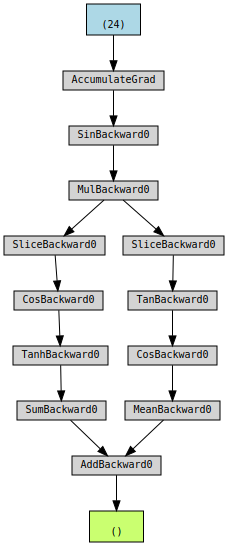

In [33]:
make_dot(loss1, params=dict(model.named_parameters()))

In [11]:
===============================================================================

SyntaxError: invalid syntax (<ipython-input-11-5da5f5f344da>, line 1)

### backward по каждому выходу

In [ ]:
input, loss1, loss2, loss3 = get_losses()

In [ ]:
loss1.backward(retain_graph=True)

In [ ]:
loss2.backward(retain_graph=True)

In [ ]:
loss3.backward()

In [ ]:
print(input.grad)

In [ ]:
make_dot(loss3, params=dict(model.named_parameters()))

### backward по сумме ошибок

In [ ]:
input, loss1, loss2, loss3 = get_losses()

In [ ]:
loss1

In [ ]:
loss = loss1+loss2+loss3
loss.backward()
print(input.grad)

# =====================

In [ ]:
input, loss1, loss2, loss3 = get_losses()

In [ ]:
loss1 += loss2+loss3

In [ ]:
loss1

In [ ]:
loss1.backward()
print(input.grad)